### Мне нужно рассчитать коэффициента БИХ фильтра методом  билинейного преобразования. НЧ прототип - Чебышев 0.3 Дб, 5 порядок, тип фильтра - ФНЧ, Wп = 1/3.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz, butter, cheby1
from scipy.fftpack import fft, fftshift


Коэффициенты БИХ фильтра (b): [0.00512555 0.02562775 0.0512555  0.0512555  0.02562775 0.00512555]
Коэффициенты БИХ фильтра (a): [ 1.         -2.51922522  3.36960552 -2.62267466  1.1825027  -0.24619074]
y[0] 0.005125550000217505
y[1] 0.038540164820435305
y[2] 0.13107577357123038
y[3] 0.2650423923142585
y[4] 0.34667291551173207


C:\Users\User\AppData\Local\Temp\ipykernel_13948\2571498120.py:29: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(y_impulse, use_line_collection=True)


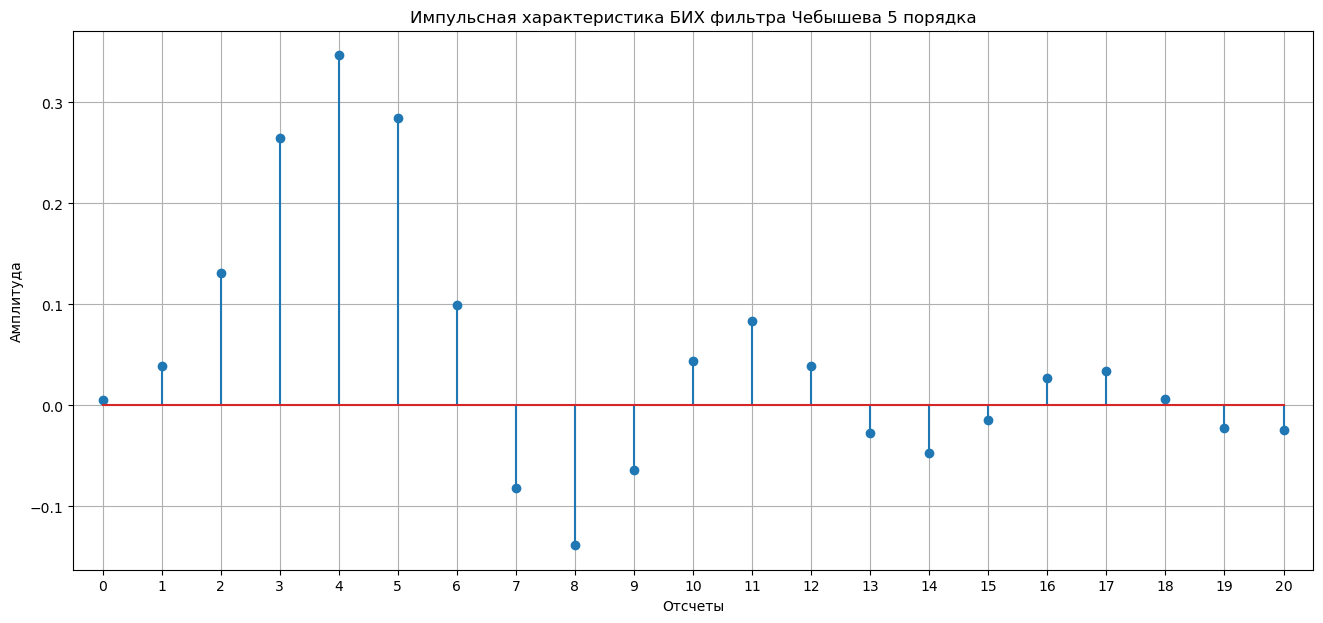

In [10]:
# Параметры фильтра
rp = 0.3  # затухание в полосе прохода (дБ)
N = 5  # порядок фильтра
Wn = 1/3  # нормированная частота среза (относительная частота: 0 до 1)


# Шаг 1: Получим коэффициенты аналогового фильтра Чебышёва
b, a = cheby1(N, rp, Wn, btype='low', analog=False)

# Вывод коэффициентов
print("Коэффициенты БИХ фильтра (b):", b)
print("Коэффициенты БИХ фильтра (a):", a)


# Шаг 3: Импульсная характеристика
N_impulse = 21
x_impulse = np.zeros(N_impulse)
x_impulse[0] = 1  # Дельта-функция как входной сигнал

# Выходной сигнал
y_impulse = lfilter(b, a, x_impulse)

for x in range(5):
    print(f"y[{x}]", y_impulse[x])

# Построение импульсной характеристики
plt.figure(figsize=(16, 7))
plt.title('Импульсная характеристика БИХ фильтра Чебышева 5 порядка')
plt.stem(y_impulse, use_line_collection=True)
plt.xlim([-0.5, N_impulse - 0.5])
plt.xticks(np.arange(0, 21, 1.0))
plt.grid(True)
plt.xlabel('Отсчеты')
plt.ylabel('Амплитуда')
plt.show()

**Если фильтр устойчив, то отсчеты y(n) уменьшаются по величине со временем**. 

Как видно на предыдущем графике - рассчитанный БИХ-фильтр - устойчив.

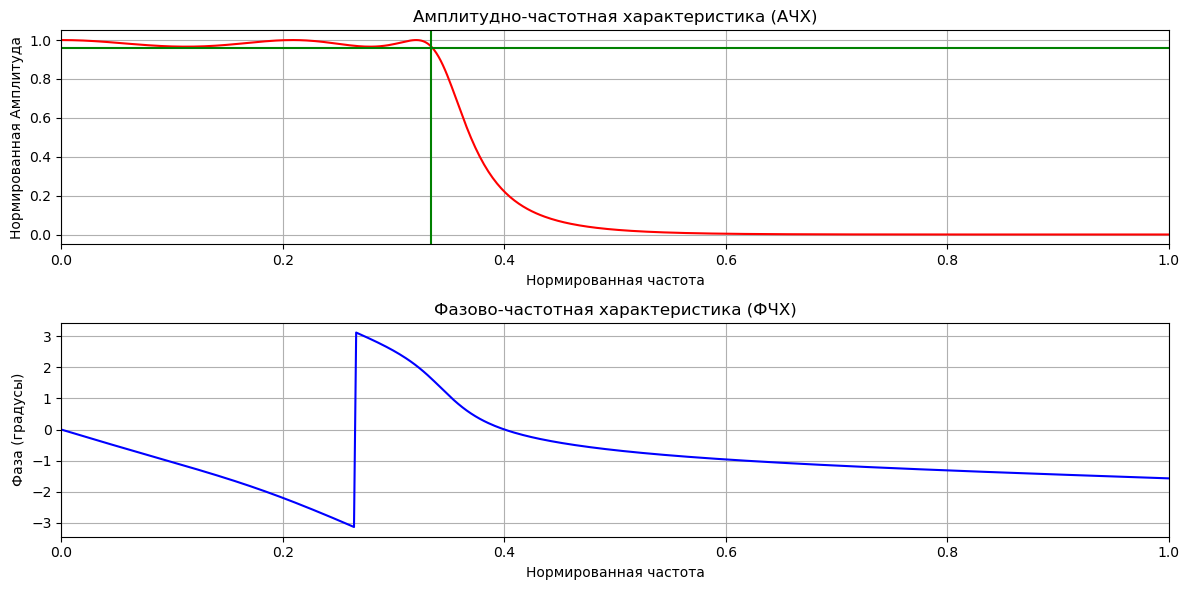

In [16]:
# Используем ранее рассчитанные b_z, a_z (коэффициенты БИХ фильтра)
# Для примера, могу добавить вручную b_z и a_z, если необходимо
# b_z, a_z = ...
N = 512
f = np.linspace(0, 1, N, endpoint=True)

# Частотная характеристика
w, h = freqz(b, a, N)

# Построение АЧХ
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.title('Амплитудно-частотная характеристика (АЧХ)')
plt.xlabel('Нормированная частота')
plt.ylabel('Нормированная Амплитуда')
h_abs = np.abs(h)
plt.plot(f, h_abs/np.max(h_abs), 'r')
plt.xlim([0, 1])
plt.axvline(1/3, color = "green")
plt.axhline(0.96, color = "green")
plt.grid(True)


# Построение ФЧХ
plt.subplot(2, 1, 2)
plt.title('Фазово-частотная характеристика (ФЧХ)')
plt.ylabel('Фаза (градусы)')
plt.xlabel('Нормированная частота')
#h_phase = np.unwrap(np.angle(h))
#plt.plot(f, h_phase, 'b')
plt.plot(f, np.angle(h), 'b')
plt.xlim([0, 1])
plt.grid(True)


plt.tight_layout()
plt.show()

Wn - точка в переходной полосе, в которой усиление впервые падает ниже rp.



Функция __np.unwrap()__ используется для устранения разрывов фазы, которые возникают при представлении углов в диапазоне 
[−𝜋,𝜋] Когда фаза проходит через границу 𝜋 или −𝜋это может вызвать резкие скачки на графике фазовой характеристики. Функция np.unwrap() решает эту проблему, добавляя или вычитая 2𝜋 к углам, чтобы устранить скачки и сделать фазу более плавной.

## Вариант Серегё Выксель

y[0] 0.004824343357716228
y[1] 0.024011073171408943
y[2] 0.04334750631996895
y[3] 0.01563884833690571
y[4] -0.07270364429883394
Коэффициенты БИХ фильтра (b): [ 0.00482434  0.         -0.01929737  0.          0.02894606  0.
 -0.01929737  0.          0.00482434]
Коэффициенты БИХ фильтра (a): [  1.          -4.97706556  11.78601964 -17.18170566  16.81926487
 -11.29410368   5.08579716  -1.40976852   0.18737949]


C:\Users\User\AppData\Local\Temp\ipykernel_13948\3946360250.py:23: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(response, use_line_collection=True)


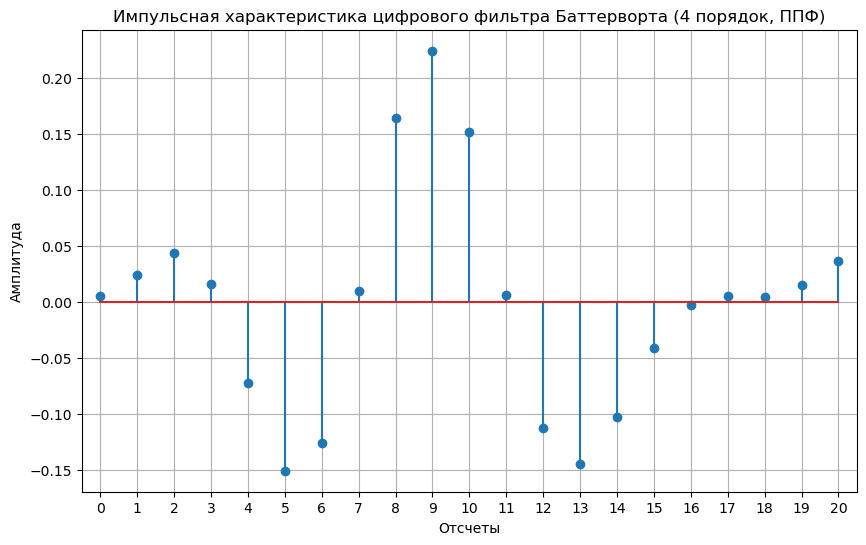

In [12]:
# Импорт необходимых библиотек
# Параметры фильтра Баттерворта
order = 4               # Порядок фильтра
wp = [2/15, 1/3]        # Частоты полосы пропускания для ППФ

# Расчет коэффициентов для цифрового полосно-пропускающего фильтра Баттерворта
b_digital, a_digital = butter(order, wp, btype='bandpass', analog=False)

# Импульсная характеристика фильтра
N_impulse = 21
x_impulse = np.zeros(N_impulse)
x_impulse[0] = 1  # Дельта-функция как входной сигнал
response = lfilter(b_digital, a_digital, x_impulse)

for x in range(5):
    print(f"y[{x}]", response[x])

print("Коэффициенты БИХ фильтра (b):", b_digital)
print("Коэффициенты БИХ фильтра (a):", a_digital)

# Построение импульсной характеристики
plt.figure(figsize=(10, 6))
plt.stem(response, use_line_collection=True)
plt.title("Импульсная характеристика цифрового фильтра Баттерворта (4 порядок, ППФ)")
plt.xlim([-0.5, N_impulse - 0.5])
plt.xticks(np.arange(0, 21, 1.0))
plt.grid(True)
plt.xlabel('Отсчеты')
plt.ylabel('Амплитуда')
plt.show()


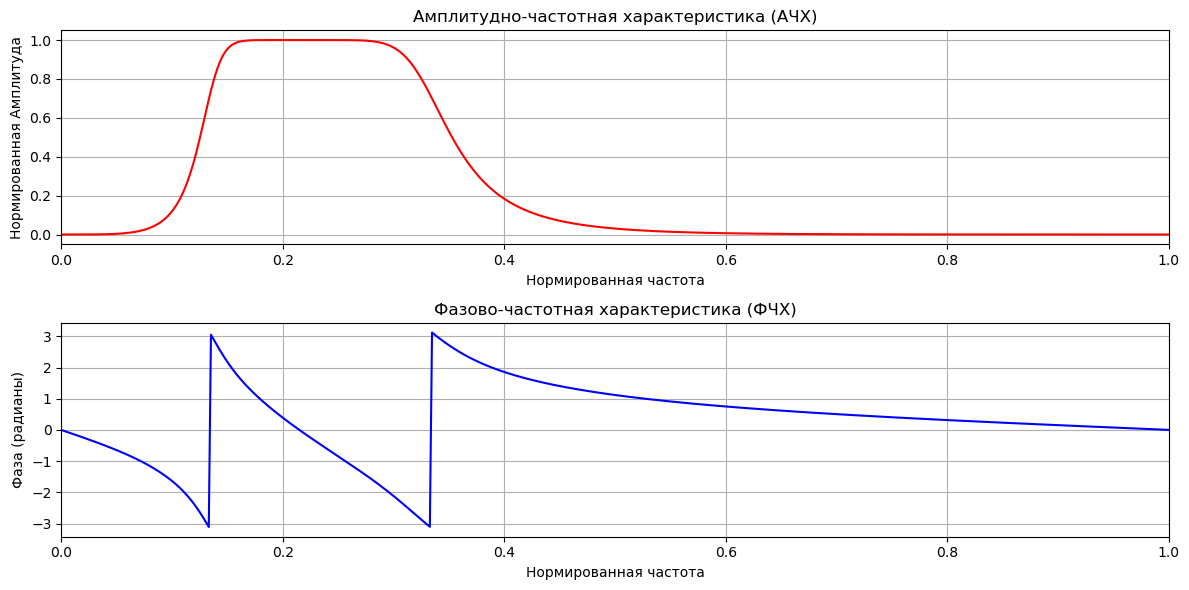

In [13]:
N = 512
f = np.linspace(0, 1, N, endpoint=True)

# Частотная характеристика
w, h = freqz(b_digital, a_digital, N)

# Построение АЧХ
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.title('Амплитудно-частотная характеристика (АЧХ)')
plt.xlabel('Нормированная частота')
plt.ylabel('Нормированная Амплитуда')
h_abs = np.abs(h)
plt.plot(f, h_abs/np.max(h_abs), 'r')
plt.xlim([0, 1])
plt.grid(True)


# Построение ФЧХ
plt.subplot(2, 1, 2)
plt.title('Фазово-частотная характеристика (ФЧХ)')
plt.ylabel('Фаза (радианы)')
plt.xlabel('Нормированная частота')
#h_phase = np.unwrap(np.angle(h))
#plt.plot(f, h_phase, 'b')
plt.plot(f, np.angle(h), 'b')
plt.xlim([0, 1])
plt.grid(True)


plt.tight_layout()
plt.show()

Епиф

Коэффициенты БИХ фильтра (b): [ 0.31616113 -1.26464452  1.89696677 -1.26464452  0.31616113]
Коэффициенты БИХ фильтра (a): [ 1.         -1.81484414  1.62888156 -0.64403635  0.14858541]
y[0] 0.31616112880068686
y[1] -0.6908613446525839
y[2] 0.128172080454807
y[3] 0.2969183969654084
y[4] 0.15432785257114945


C:\Users\User\AppData\Local\Temp\ipykernel_13948\1670800220.py:28: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(y_impulse, use_line_collection=True)


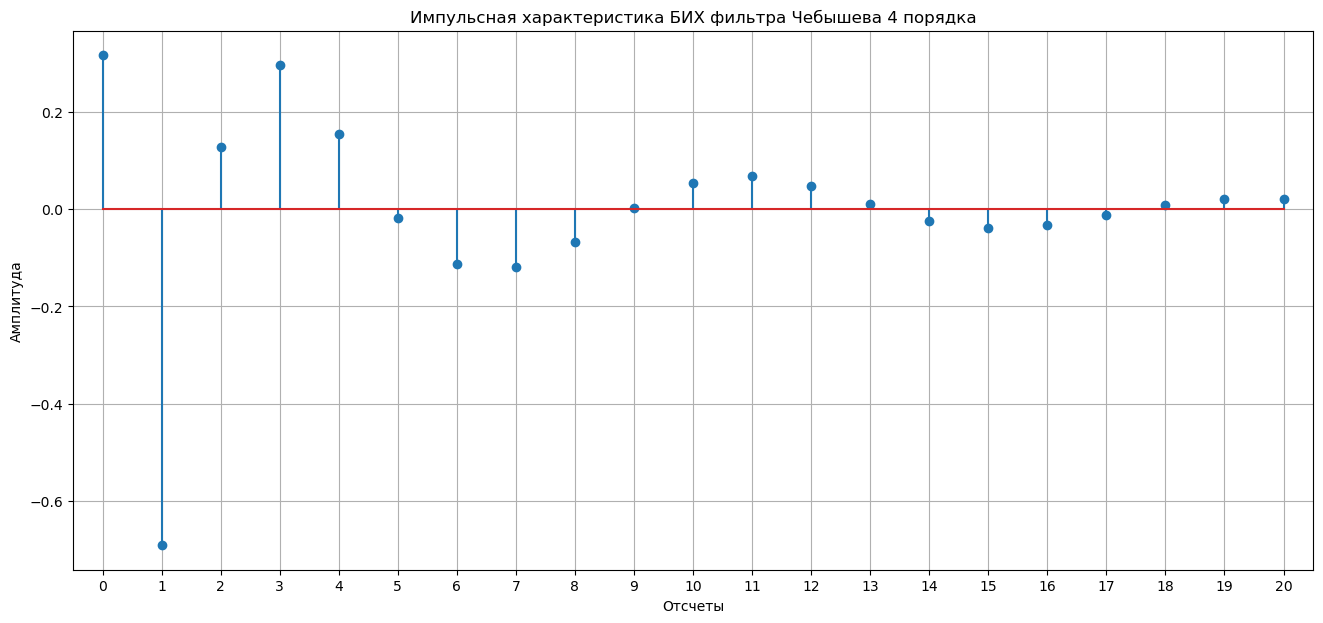

In [14]:
# Параметры фильтра
rp = 0.3  # затухание в полосе прохода (дБ)
N = 4  # порядок фильтра
Wn = 1/4  # нормированная частота среза (относительная частота: 0 до 1)

# Шаг 1: Получим коэффициенты аналогового фильтра Чебышёва
b1, a1 = cheby1(N, rp, Wn, btype='high', analog=False)

# Вывод коэффициентов
print("Коэффициенты БИХ фильтра (b):", b1)
print("Коэффициенты БИХ фильтра (a):", a1)


# Шаг 3: Импульсная характеристика
N_impulse = 21
x_impulse = np.zeros(N_impulse)
x_impulse[0] = 1  # Дельта-функция как входной сигнал

# Выходной сигнал
y_impulse = lfilter(b1, a1, x_impulse)

for x in range(5):
    print(f"y[{x}]", y_impulse[x])

# Построение импульсной характеристики
plt.figure(figsize=(16, 7))
plt.title('Импульсная характеристика БИХ фильтра Чебышева 4 порядка')
plt.stem(y_impulse, use_line_collection=True)
plt.xlim([-0.5, N_impulse - 0.5])
plt.xticks(np.arange(0, 21, 1.0))
plt.grid(True)
plt.xlabel('Отсчеты')
plt.ylabel('Амплитуда')
plt.show()

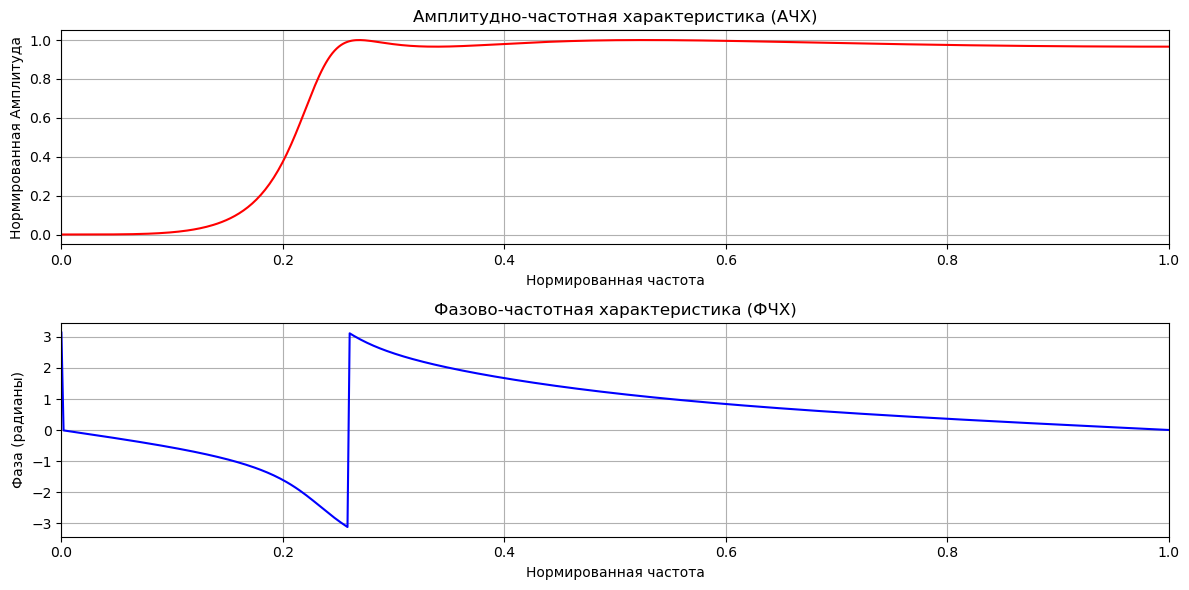

In [15]:
# Используем ранее рассчитанные b_z, a_z (коэффициенты БИХ фильтра)
# Для примера, могу добавить вручную b_z и a_z, если необходимо
# b_z, a_z = ...
N = 512
f = np.linspace(0, 1, N, endpoint=True)

# Частотная характеристика
w, h = freqz(b1, a1, N)

# Построение АЧХ
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.title('Амплитудно-частотная характеристика (АЧХ)')
plt.xlabel('Нормированная частота')
plt.ylabel('Нормированная Амплитуда')
h_abs = np.abs(h)
plt.plot(f, h_abs/np.max(h_abs), 'r')
plt.xlim([0, 1])
plt.grid(True)


# Построение ФЧХ
plt.subplot(2, 1, 2)
plt.title('Фазово-частотная характеристика (ФЧХ)')
plt.ylabel('Фаза (радианы)')
plt.xlabel('Нормированная частота')
#h_phase = np.unwrap(np.angle(h))
#plt.plot(f, h_phase, 'b')
plt.plot(f, np.angle(h), 'b')
plt.xlim([0, 1])
plt.grid(True)


plt.tight_layout()
plt.show()